# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import math


# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [2]:
df = pd.read_csv('Wholesale_Data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.isnull().sum().sort_values(ascending=False)

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

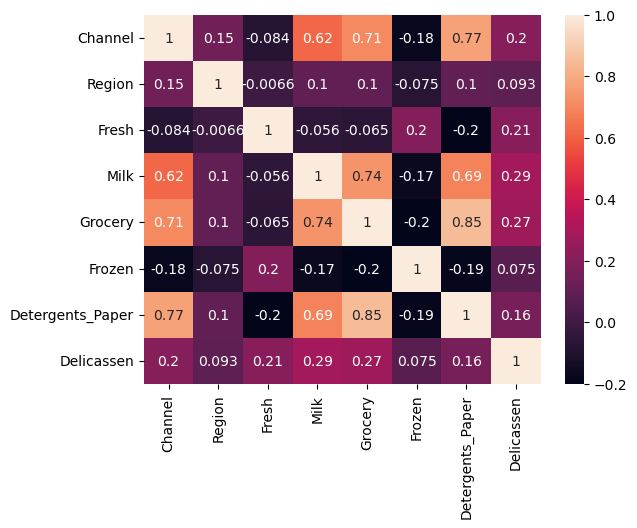

In [13]:
sns.heatmap(df.corr(), annot=True)
plt.show()

IndexError: index 8 is out of bounds for axis 0 with size 8

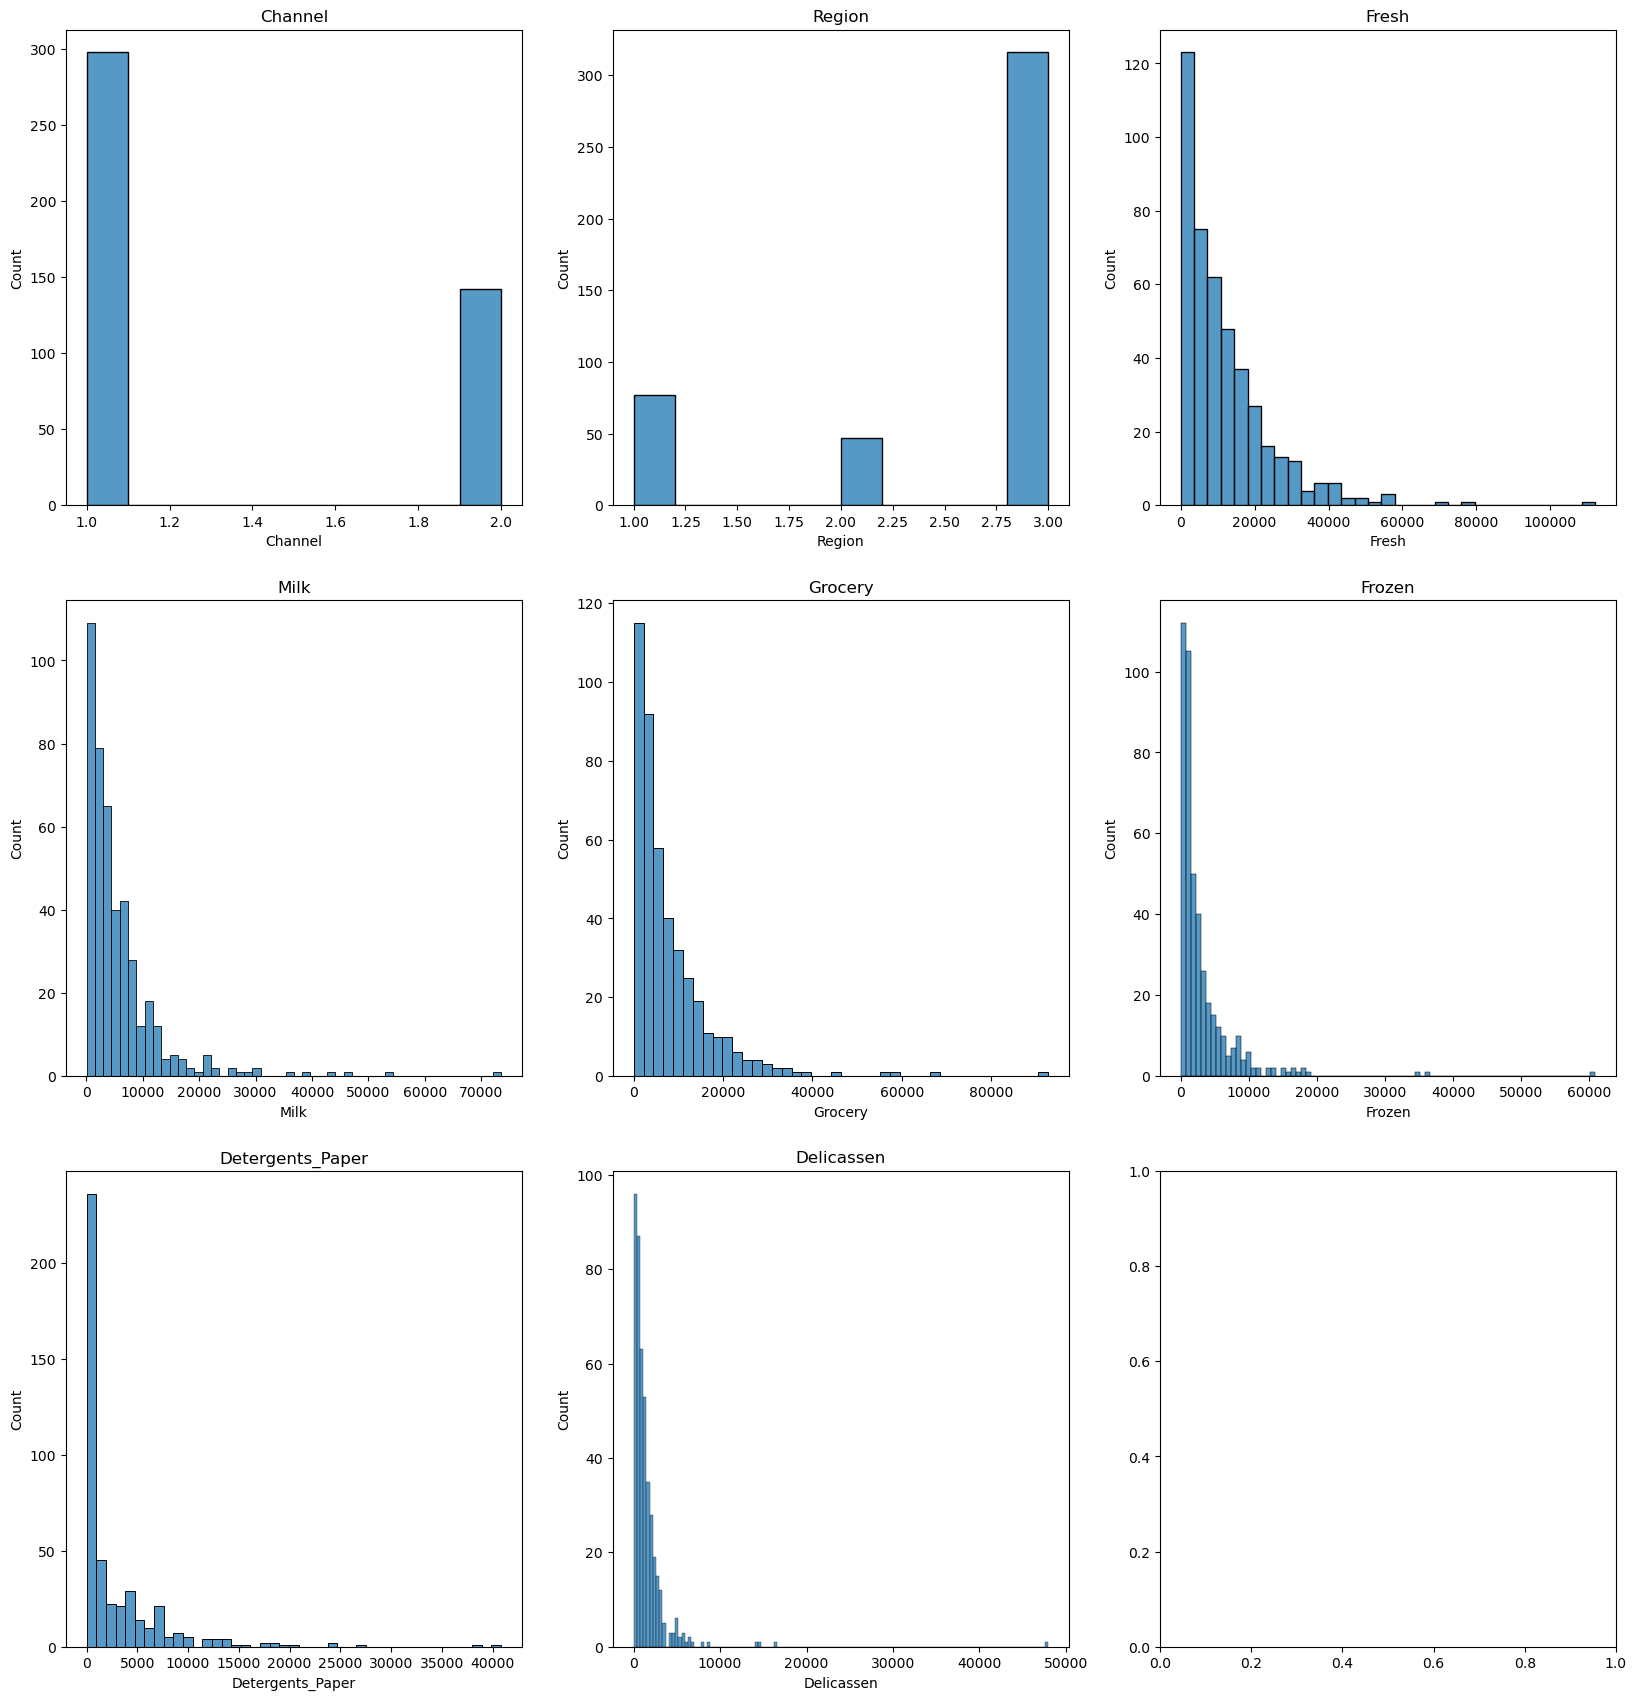

In [7]:
def grouphist(columns):
    fig, axs = plt.subplots(nrows=math.ceil(len(columns) / 3), ncols=3, figsize=(20, math.ceil(len(columns) / 3) * 7))
    for idx, ax in enumerate(axs.flatten()):
        sns.histplot(df[columns[idx]], ax=ax)
        ax.set_title(columns[idx])
    plt.show()
grouphist(df.columns)

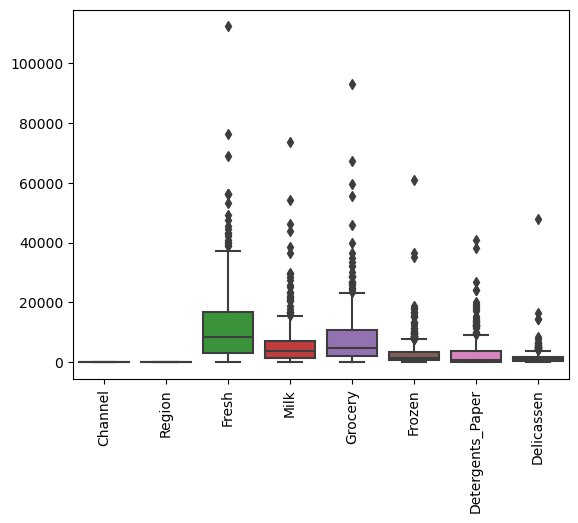

In [8]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

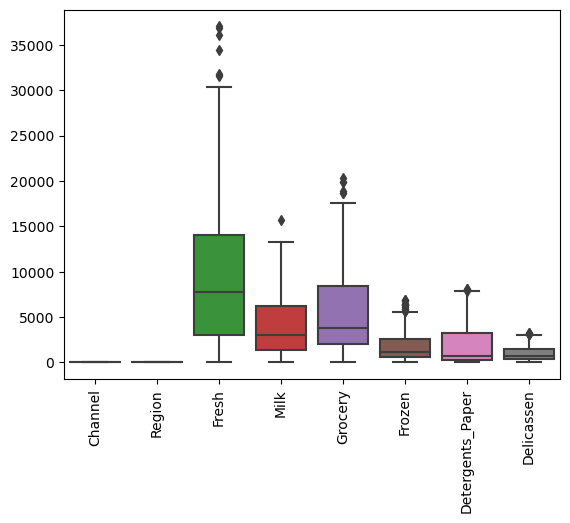

In [9]:
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df.loc[(df[col] > fence_low) & (df[col] < fence_high)]
    return df_out

for col in df.columns:
    df = remove_outliers(df, col)
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

IndexError: index 8 is out of bounds for axis 0 with size 8

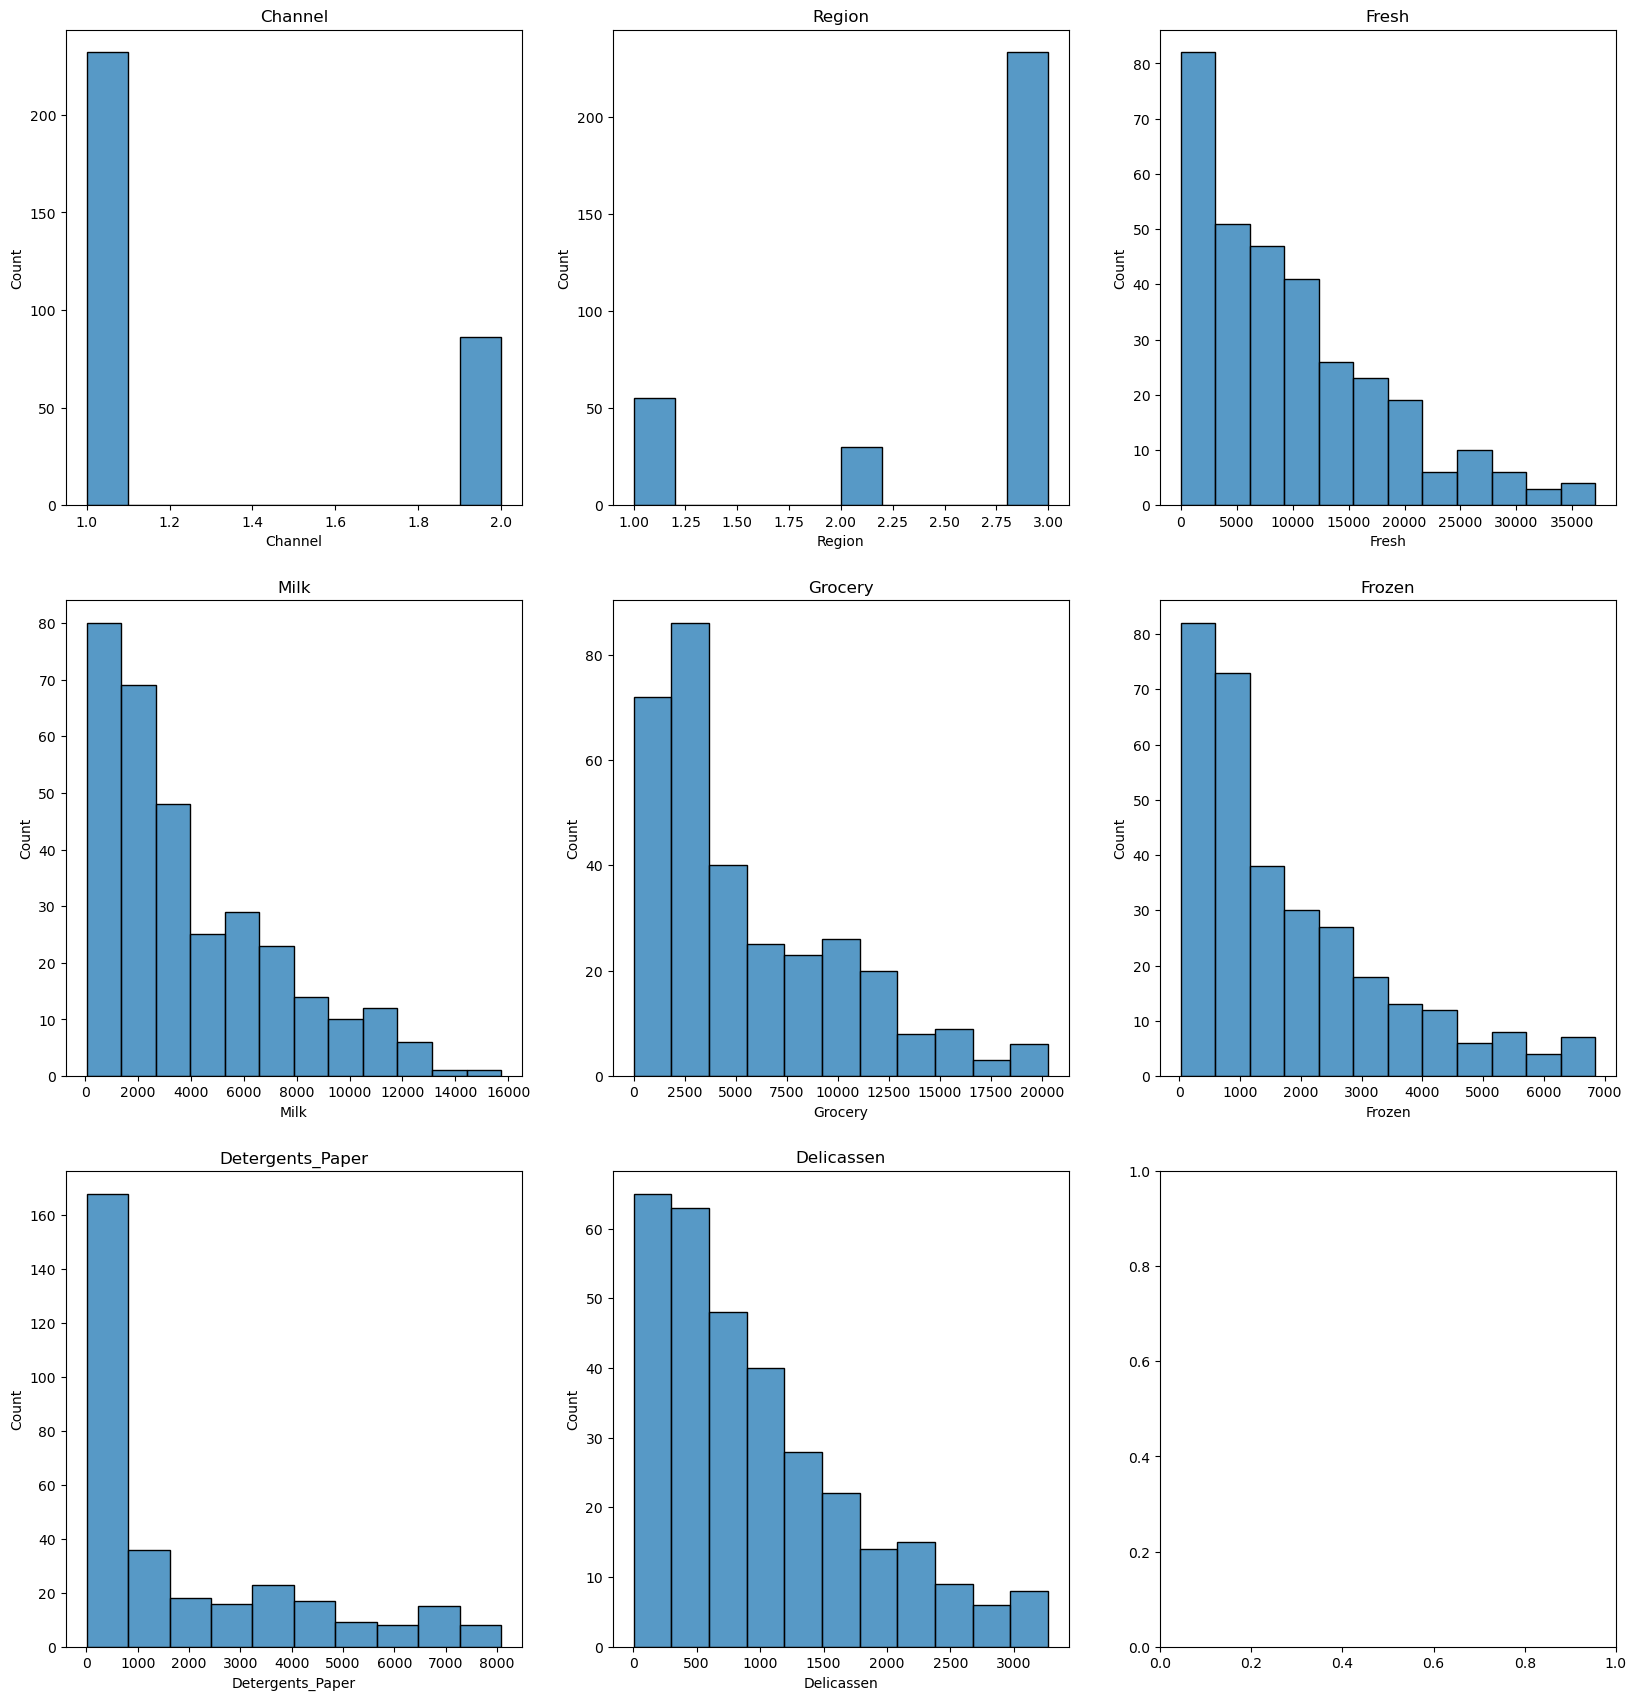

In [10]:
columns = df.columns
for col in columns:
    df = df[df[col] != 0]
grouphist(columns)

In [12]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

c:\Users\Kingslayer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Kingslayer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Kingslayer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Kingslayer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a m

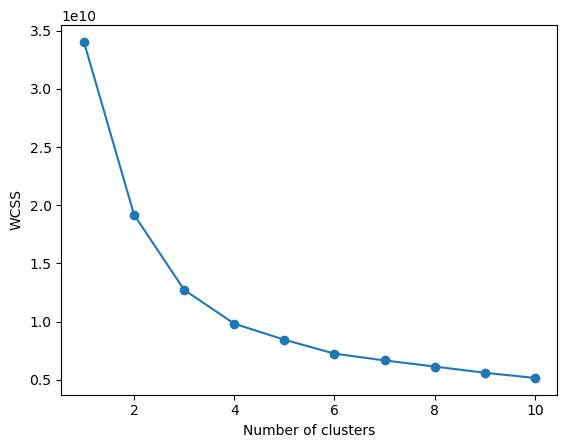

In [14]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
plot_distortion(df, 10)

We can conclude that the ideal number of clusters is 4

In [16]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(df)
cluster_labels = kmeans.labels_

# Add cluster labels to your original dataframe
df['Cluster'] = cluster_labels
df.head()

c:\Users\Kingslayer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Kingslayer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,2
3,1,3,13265,1196,4221,6404,507,1788,0
5,2,3,9413,8259,5126,666,1795,1451,1
6,2,3,12126,3199,6975,480,3140,545,0


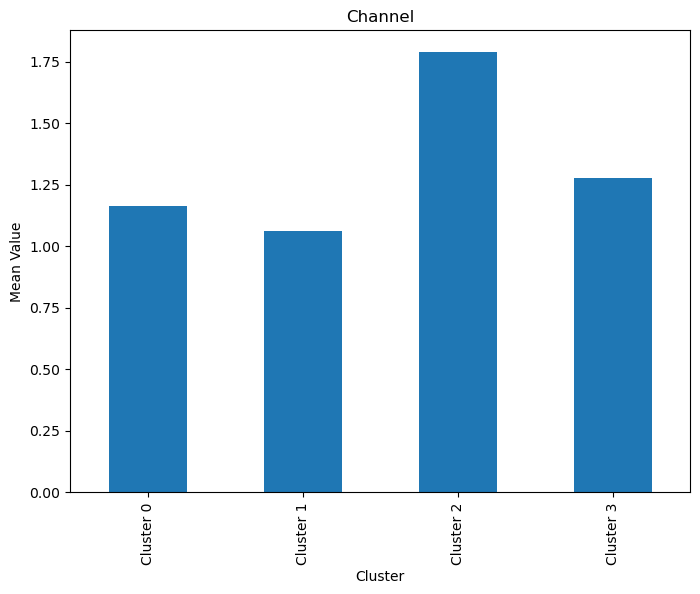

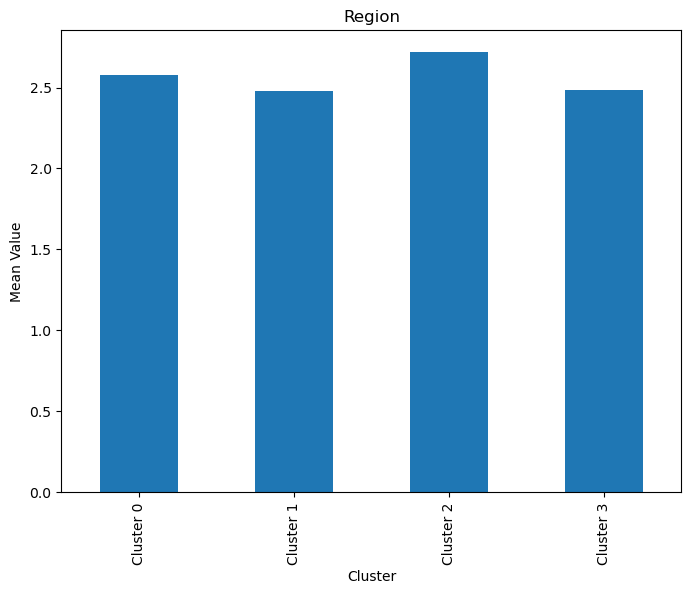

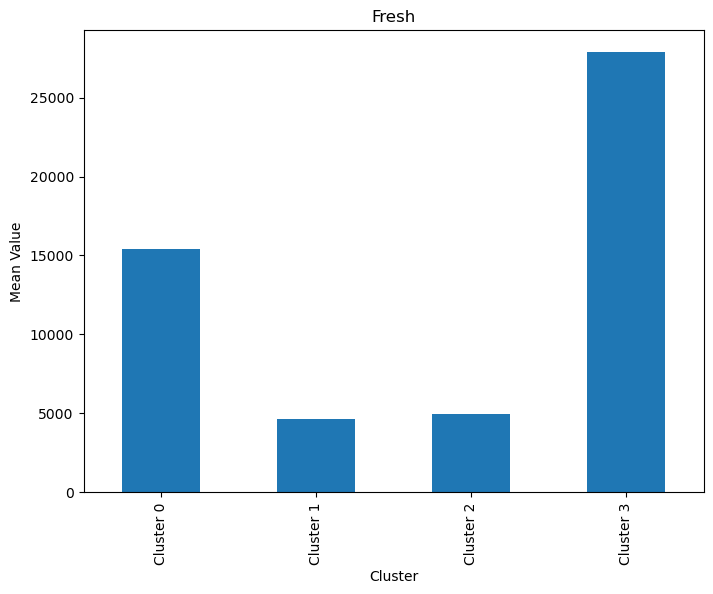

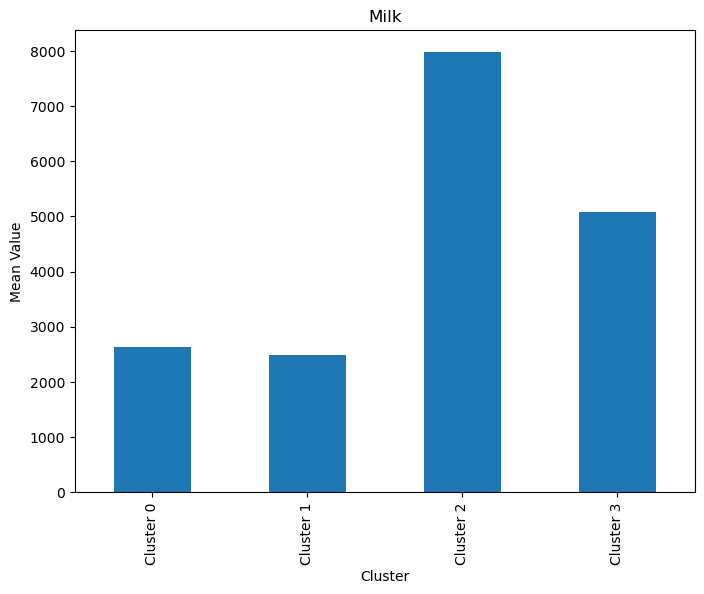

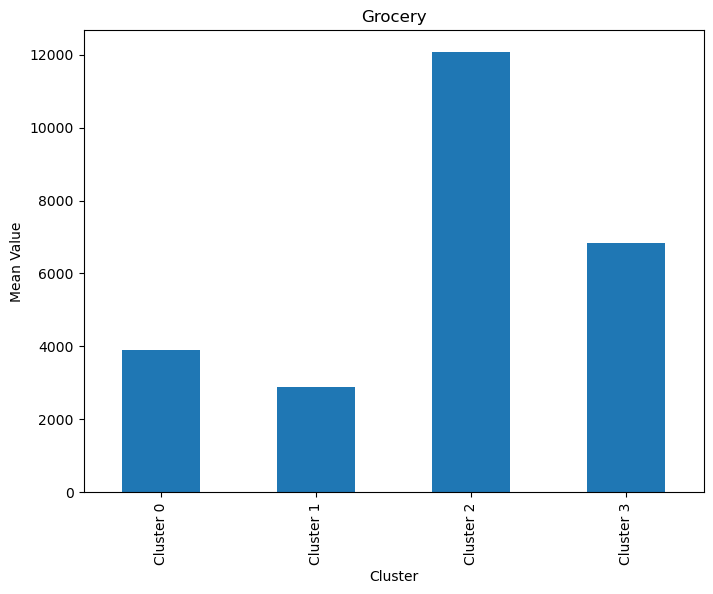

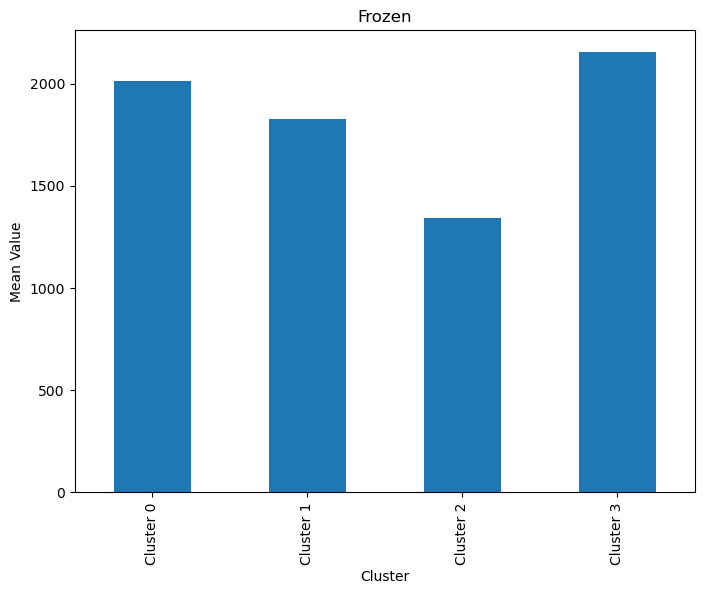

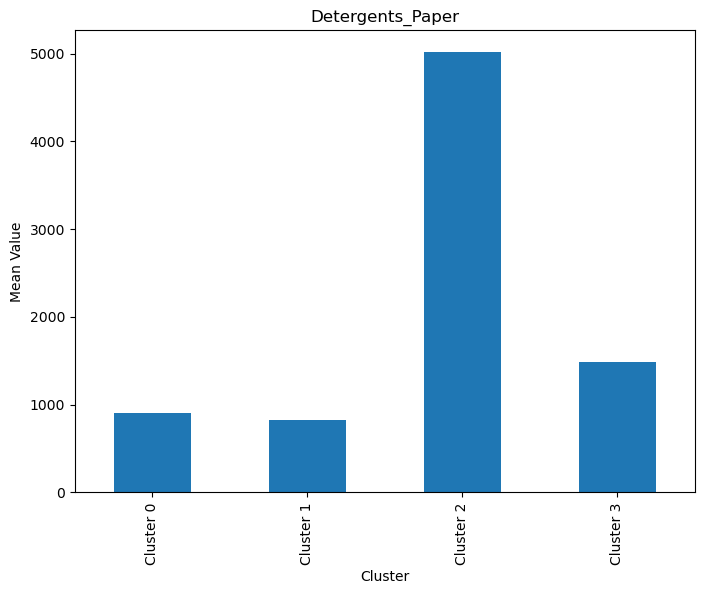

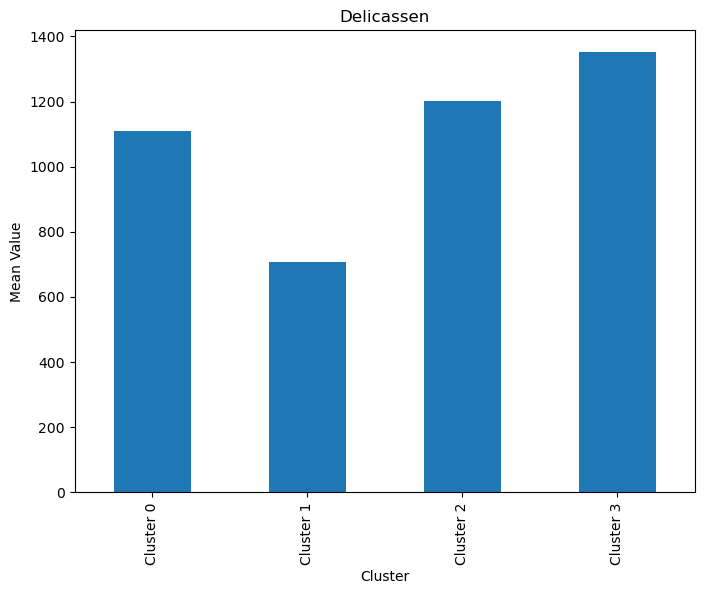

In [17]:
cluster_means = df.groupby('Cluster').mean()

# Transpose the DataFrame so that the features are the rows (this will make plotting easier)
cluster_means = cluster_means.transpose()

# Create bar plot for each feature
for feature in cluster_means.index:
    cluster_means.loc[feature].plot(kind='bar', figsize=(8,6))
    plt.title(feature)
    plt.ylabel('Mean Value')
    plt.xticks(ticks=range(4), labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
    plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

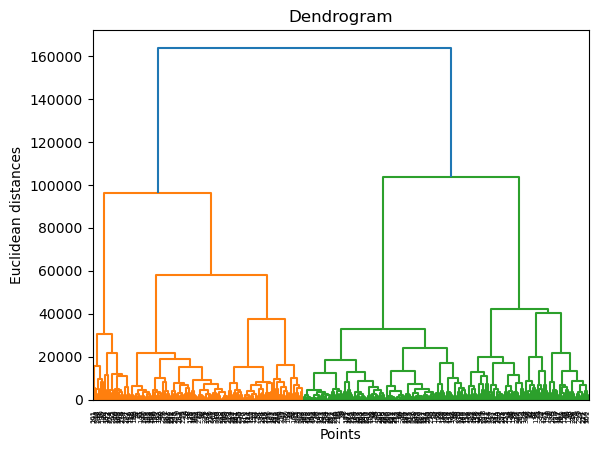

In [22]:
import scipy.cluster.hierarchy as sch
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()
plot_dendrogram(df)

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

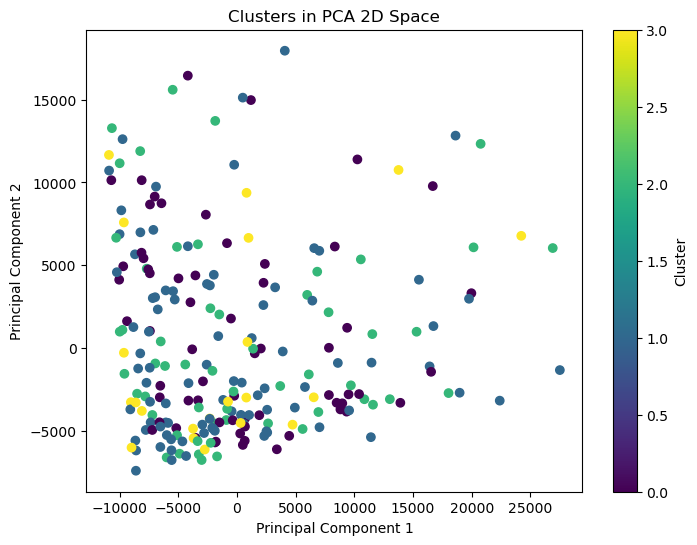

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA and fit the features selected
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df.drop('Cluster', axis=1))

# Create a DataFrame with the two components
PCA_components = pd.DataFrame(principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Concatenate the clusters labels to the DataFrame
PCA_components['Cluster'] = df['Cluster']

# Plot the clustered dataset
plt.figure(figsize=(8,6))
plt.scatter(PCA_components['Principal Component 1'], PCA_components['Principal Component 2'], c=PCA_components['Cluster'])
plt.title('Clusters in PCA 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.